In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [4]:
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/adversity_tou/"
filename = "MAC000031.csv"
dataset = read_csv(folder + filename,parse_dates = ['tstp'], index_col = ['tstp'])

In [5]:
train = dataset[:33600]
test = dataset[33600:]

In [41]:
test

,energy(kWh/hh)
tstp,
2013-01-12 00:00:00,0.342
2013-01-12 00:30:00,0.401
2013-01-12 01:00:00,0.266
2013-01-12 01:30:00,0.129
2013-01-12 02:00:00,0.147
2013-01-12 02:30:00,0.144
2013-01-12 03:00:00,0.136
2013-01-12 03:30:00,0.145
2013-01-12 04:00:00,0.134


In [25]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = train.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.830616
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


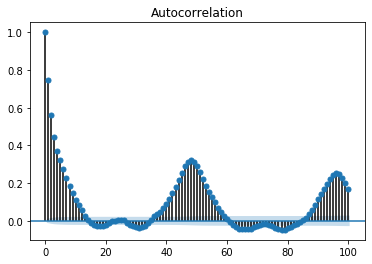

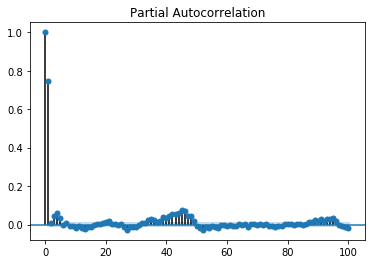

In [59]:
plot_acf(train['energy(kWh/hh)'],lags=100)
plt.show();
#q=10
plot_pacf(train['energy(kWh/hh)'],lags=100)
plt.show();
# p = 2

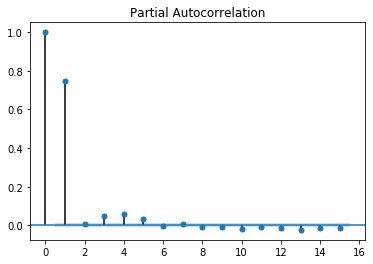

In [7]:
plot_pacf(train['energy(kWh/hh)'],lags=15)
plt.show();

# p = 2

In [77]:
arima_model = ARIMA(train,order = (2,0,0)).fit()
# p,d,q

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [78]:
print(arima_model.summary())

                              ARMA Model Results                              
Dep. Variable:         energy(kWh/hh)   No. Observations:                33600
Model:                     ARMA(2, 0)   Log Likelihood               -5377.370
Method:                       css-mle   S.D. of innovations              0.284
Date:                Wed, 22 Apr 2020   AIC                          10762.739
Time:                        13:26:49   BIC                          10796.428
Sample:                             0   HQIC                         10773.491
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4001      0.006     64.882      0.000       0.388       0.412
ar.L1.energy(kWh/hh)     0.7413      0.005    135.889      0.000       0.731       0.752
ar.L2.energy

In [79]:
ARIMA_prediction = arima_model.predict(start=33600, end =35087,typ= 'levels')

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [80]:
y_test = test['energy(kWh/hh)'].to_list()

In [81]:
y_pred = ARIMA_prediction.to_list()

In [82]:
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(y_test,y_pred))

0.34862425805302943


In [83]:
import numpy as np
def sMAPE(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [84]:
sMAPE(y_test,y_pred)

72.43669266144256